In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def GenerateRandomUniform(N: int, theta: float):
    array = np.random.uniform(theta, 2 * theta, N)
    array.sort()
    return array

In [76]:
N = 100
theta = 9.9
generated = GenerateRandomUniform(N, theta)
print(f"θ = {theta} \nСгенерированная выборка = ", generated)

θ = 9.9 
Сгенерированная выборка =  [ 9.97036633 10.03177219 10.04697015 10.1734277  10.27814082 10.48515874
 10.53989206 10.65222728 10.65496052 10.78075326 10.87610792 10.88116102
 10.89311581 11.04760066 11.07045132 11.16221362 11.23057201 11.23084532
 11.27375862 11.33001517 11.36874262 11.39776783 11.47932575 11.49146286
 11.64684265 11.65743586 11.75603907 12.03262242 12.14763596 12.20014028
 12.27258668 12.64435407 12.65902138 13.09933923 13.22838511 13.29026064
 13.57956466 13.64841622 13.70075932 13.84667887 13.89741007 13.9087664
 13.91180697 13.95495682 14.40241659 14.43484411 14.44321496 14.4848611
 14.49946735 14.81219912 14.81994497 15.015027   15.02839825 15.1229923
 15.28795383 15.31529333 15.35679807 15.39837866 15.40932611 15.54498028
 15.79550156 15.8297191  15.90471906 15.92567283 16.23807566 16.25430257
 16.33411792 16.36068022 16.53109853 16.54205436 17.01343844 17.03277036
 17.37765654 17.43480708 17.58836012 17.60094108 17.68554885 17.70821397
 17.79336127 17.93

## Точный доверительный интервал 

In [77]:
def ConfidenceIntervalАccurateTheta(x):
    x_avg = np.mean(x)
    n = len(x)
    sqrt_n = n ** 0.5
    left = x_avg * np.sqrt(12) / (np.sqrt(27) + 1.96 / sqrt_n)
    right = x_avg * np.sqrt(12) / (np.sqrt(27) - 1.96 / sqrt_n)
    return (left, right)

In [78]:
a, b = ConfidenceIntervalАccurateTheta(generated)
print(a, b)
print("Точный доверительный интервал. Длина =", b - a)

9.468508785798836 10.210817245672542
Точный доверительный интервал. Длина = 0.7423084598737066


## Асимптотический доверительный интервал. ОММ

In [79]:
def ConfidenceIntervalAsymptoticThetaOMM(x):
    x_avg = np.mean(x)
    g_alpha = 2 / 3 * x_avg  
    n = len(x)
    alpha_1 = x_avg
    alpha_2 = np.mean(x * x)
    same_part =  1.96 * 2 * np.sqrt(alpha_2 - alpha_1 ** 2) / n ** 0.5 / 3
    left = - same_part + g_alpha
    right = same_part + g_alpha
    return (left, right)

In [80]:
a, b = ConfidenceIntervalAsymptoticThetaOMM(generated)
print(a, b)
print("Асимптотический ОММ. Длина =", b - a)

9.433081962732857 10.218244032115372
Асимптотический ОММ. Длина = 0.7851620693825154


## Bootstrap

In [81]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [82]:
def UniformGenerate(x, N):
    theta = max(x) / 2
    return [GenerateRandomUniform(len(x), theta) for _ in range(N)]

def BootstrapParametricTheta(x):
    N = 50000
    generated_with_model = UniformGenerate(x, N)
    theta_stars = []
    for current_sample in generated_with_model:
        theta_stars.append(np.mean(current_sample) * 2 / 3)
    theta_stars = np.sort(theta_stars)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1 
    return theta_stars[k1], theta_stars[k2]

In [83]:
a, b = BootstrapParametricTheta(generated)
print(a, b)
print("Параметрический bootstrap. Оценка - ОММ. Длина =", b - a)

9.514507539278986 10.265917373791906
Параметрический bootstrap. Оценка - ОММ. Длина = 0.7514098345129199


In [84]:
def BootstrapNonParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample, 1000)
    theta_star = 2 / 3  * np.mean(sample)
    delts = []
    for current_sample in bootstrap_generated:
        delts.append(2 / 3 * np.mean(current_sample) - theta_star)
    delts.sort()
    return (-delts[974] + theta_star , -delts[24] + theta_star)

In [85]:
a, b = BootstrapNonParametricTheta(generated)
print(a, b)
print("Непараметрический bootstrap. Оценка - ОММ. Длина =", b - a)

9.413917192345764 10.209455879404144
Непараметрический bootstrap. Оценка - ОММ. Длина = 0.7955386870583805


## Сравнение доверительных интервалов

In [86]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

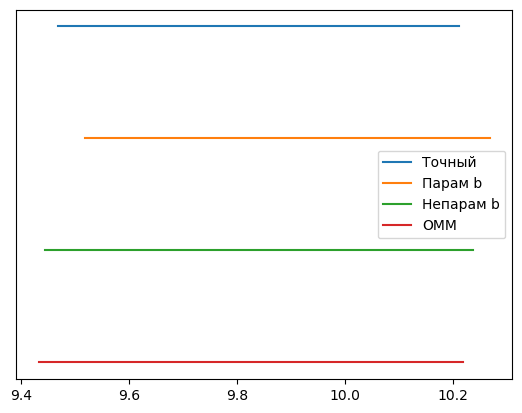

In [87]:
func_list = [ConfidenceIntervalАccurateTheta, BootstrapParametricTheta, BootstrapNonParametricTheta, ConfidenceIntervalAsymptoticThetaOMM]
names_list = ['Точный', 'Парам b', 'Непарам b', 'ОММ']
Compare(generated, func_list, names_list)